## Introduction about this Notebook

This notebook contains examples from libraries used to visualize data such as seaborn, plotly. Your comments and advices are very important for me to improve myself.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#seaborn
import seaborn as sns

# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore') 

#World Cloud
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


# First meeting with data


In [2]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
data.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [5]:
data.shape

(18207, 89)

In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Take a sample from raw data for visualization

In [7]:
sample_cols = ['ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Contract Valid Until',
       'Height', 'Weight',]

sample_data = data[sample_cols]

sample_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Height,Weight
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,2021,5'7,159lbs
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,2022,6'2,183lbs
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,2022,5'9,150lbs
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020,6'4,168lbs
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,2023,5'11,154lbs


In [8]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Positi

In [9]:
sample_data.isnull().sum() / len(sample_data)

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        0.013237
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.002636
International Reputation    0.002636
Weak Foot                   0.002636
Skill Moves                 0.002636
Work Rate                   0.002636
Position                    0.003295
Contract Valid Until        0.015873
Height                      0.002636
Weight                      0.002636
dtype: float64

In [10]:
sample_data = sample_data.dropna()

In [11]:
sample_data.shape

(17918, 18)

# **subplots**

*  using the variable ax for single a Axes
        fig, ax = plt.subplots()

*  using the variable axs for multiple Axes
       fig, axs = plt.subplots(2, 2)

* using tuple unpacking for multiple Axes
       fig, (ax1, ax2) = plt.subplot(1, 2)
       fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)

Text(0.5, 1.0, 'Overall Score')

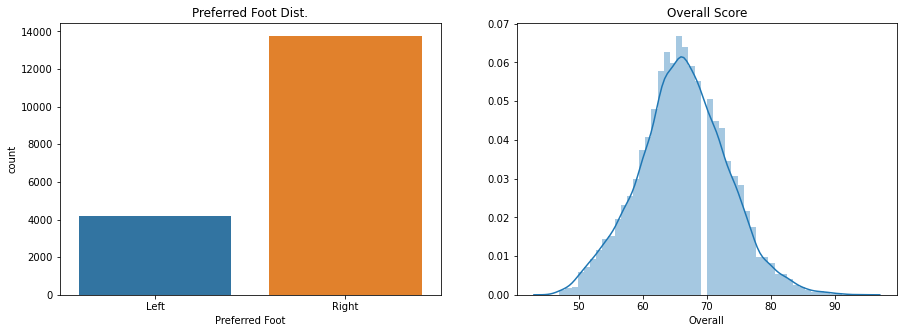

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(15,5))

sns.countplot('Preferred Foot' , data = sample_data , ax = ax1).set_title('Preferred Foot Dist.')
sns.distplot(sample_data['Overall'] , ax=ax2).set_title('Overall Score')


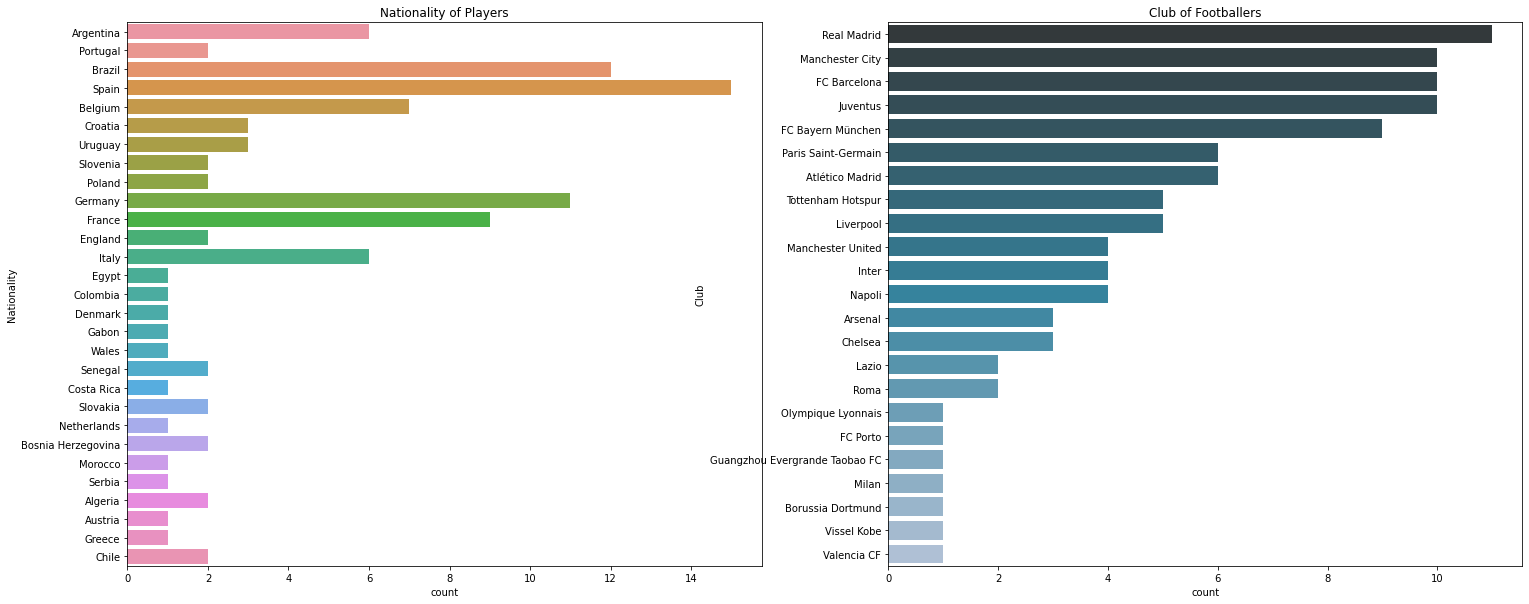

In [13]:
fig,(ax3,ax4) = plt.subplots(1,2 , figsize=(25,10))


sns.countplot(y = 'Nationality' , data = sample_data.loc[:100,:] , ax = ax3).set_title('Nationality of Players')
# Second Graph was sorted by the value counts 
sns.countplot(y = 'Club' , data = sample_data.loc[:100,:] , order = sample_data.loc[:100,'Club'].value_counts().index, palette = 'PuBuGn_d', ax = ax4).set_title('Club of Footballers')

plt.savefig('horizontal.png')

# WordCloud

You can find detailed informations about WordCloud in this [link](https://amueller.github.io/word_cloud)

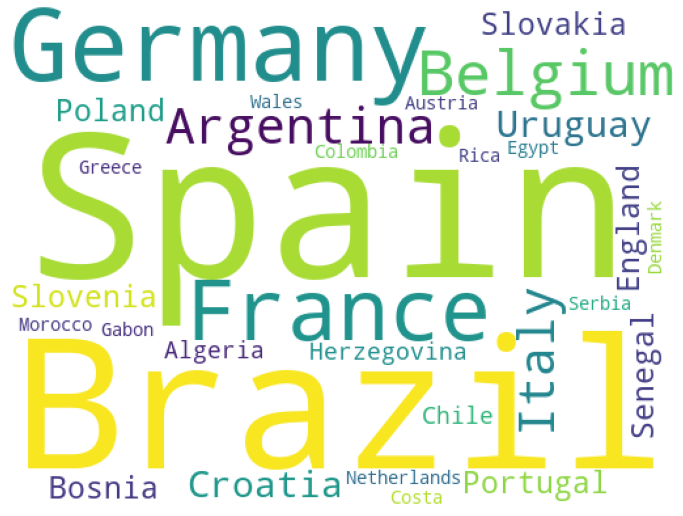

<Figure size 432x288 with 0 Axes>

In [14]:
#Top100 Players Country distribution

dftop = sample_data.loc[:100,:]

plt.subplots(figsize=(12,12))

wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(dftop['Nationality']))

plt.imshow(wordcloud)

plt.axis('off')


plt.show()

plt.savefig('wordcloud.png')

# BoxPlot

*  Analysis Value of top300 players.
*  BoxPlot from the Pyplot library was used. It is very useful cuz It makes the graphs more understandable.
*  Value distribution by player ranking range. (0~100 , 100~200 , 200~300)
*  BoxPlots are useful to understand description of data. You can see the quartiles (25% , 75% , Median) of data and also you can detect outliers easily with this plot.

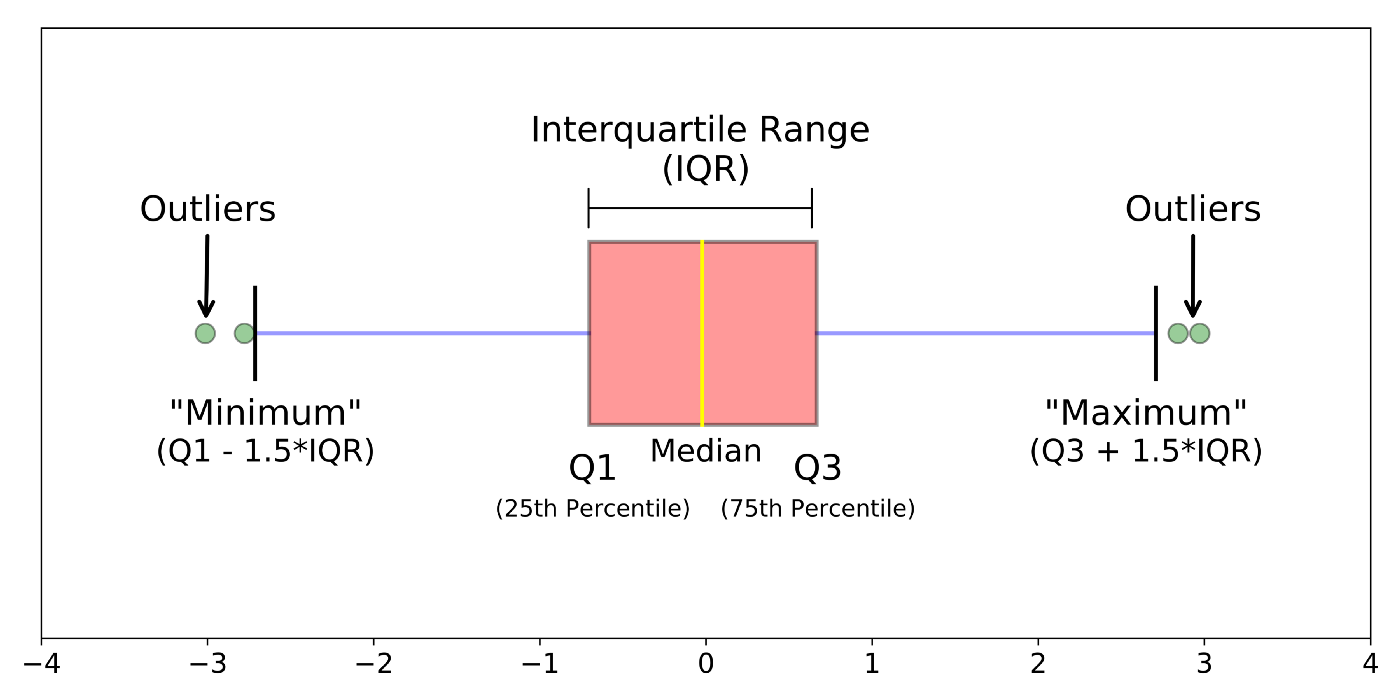

In [15]:
datatop300 = sample_data.loc[:300,:]
datatop300['Value'] = pd.Series(float(i[1:-1]) for i in datatop300['Value'])

data1 = go.Box(
    y=datatop300.loc[:100,'Value'],
    name = 'Value of Top100 Players',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

data2 = go.Box(
    y=datatop300.loc[100:200,'Value'],
    name = 'Value of Top 100~200 Players',
    marker = dict(
        color = 'rgb(12, 140, 12)',
    )
)

data3 = go.Box(
    y=datatop300.loc[200:300,'Value'],
    name = 'Value of top 200~300 Players',
    marker = dict(
        color = 'rgb(140, 12, 12)',
    )
)

data = [data1,data2,data3]
iplot(data)

plt.savefig('box.png')


<Figure size 432x288 with 0 Axes>

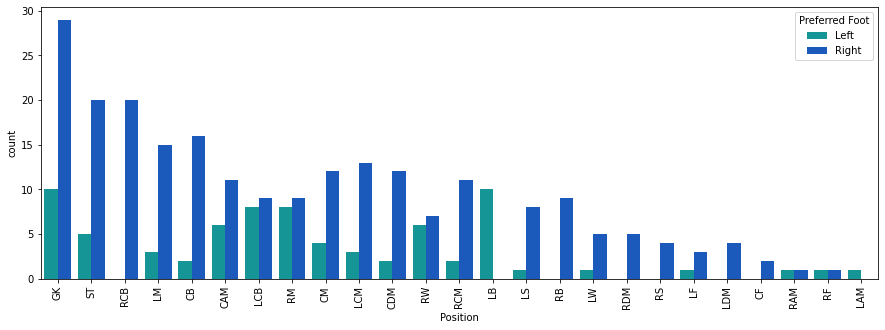

In [16]:
plt.subplots(figsize=(15,5))
sns.countplot('Position', data=datatop300 ,hue = 'Preferred Foot', order = datatop300['Position'].value_counts().index , palette = 'winter_r')
plt.xticks(rotation=90)

plt.savefig('vertical.png')

# Violin Plot

* x, y, huenames of variables in data or vector data, optional. Inputs for plotting long-form data. See examples for interpretation.
* dataDataFrame, array, or list of arrays, optional
* inner{“box”, “quartile”, “point”, “stick”, None}, optional. Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.
* palettepalette name, list, or dict, optional. Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

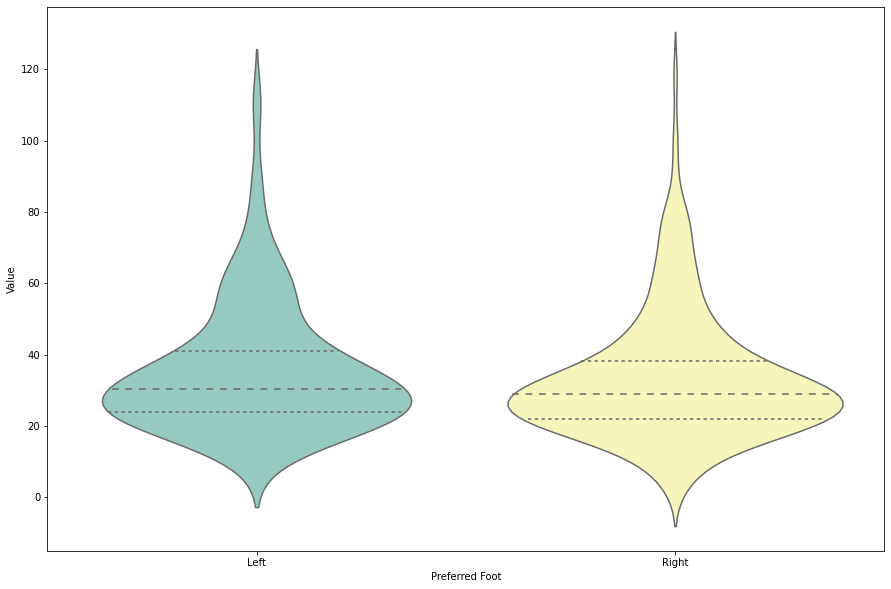

In [17]:
fig = plt.subplots(figsize=(15,10))
sns.violinplot(x = 'Preferred Foot' , y = 'Value', data = datatop300 ,inner = 'quartile' , palette ='Set3')

plt.savefig('violin.png')

# Scatter Plot

This is the relaional plot . And generally i am using for to find distribution patterns.

### we used scatter plot to understand the value age relationship

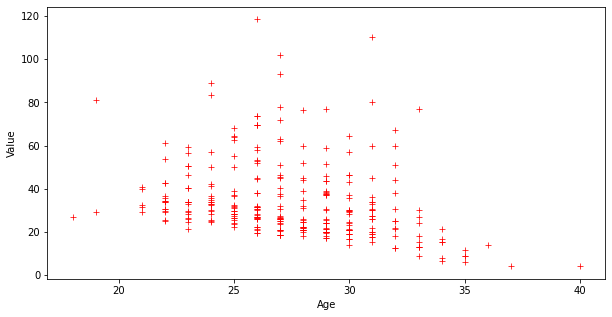

In [18]:
plt.subplots(figsize=(10,5))
sns.scatterplot (x = 'Age' , y = 'Value' , data = datatop300, color = 'red' , marker = '+')

# Pie Chart

This pie chart sample shows us Nationality distribution of top 100 Players 

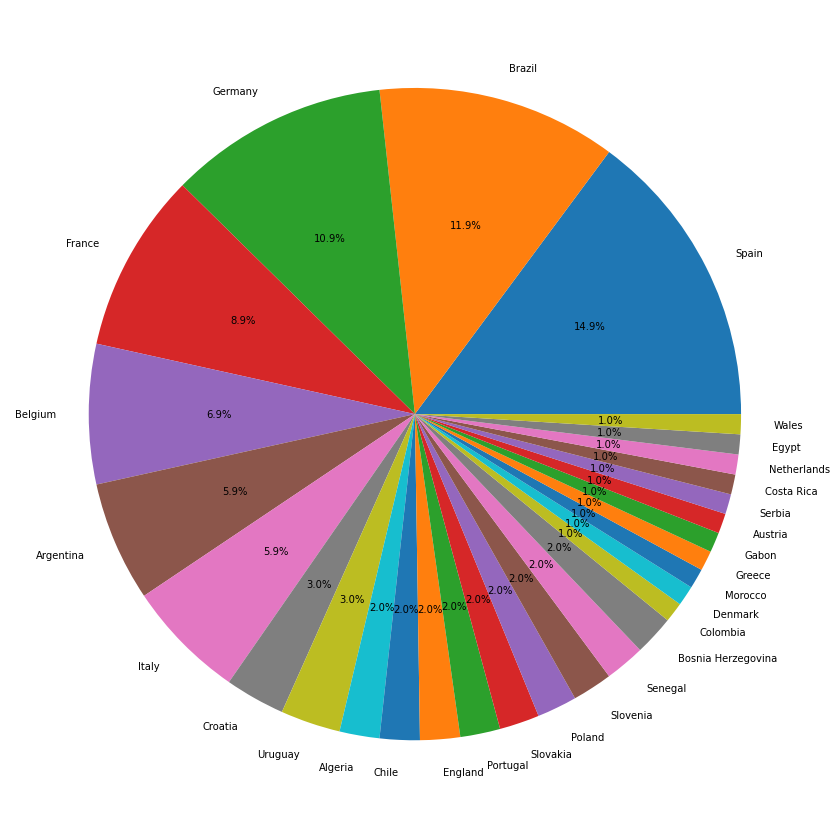

In [19]:
labels= dftop['Nationality'].value_counts().index

sizes = dftop['Nationality'].value_counts().values
plt.figure(figsize = (15,15))
plt.pie(sizes,  labels=labels, autopct='%1.1f%%')
plt.show()